<a href="https://colab.research.google.com/github/GiorgosLyberis/mcda/blob/main/Methods%20For%20Statistical%20Data%20Analysis/Lab_5/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

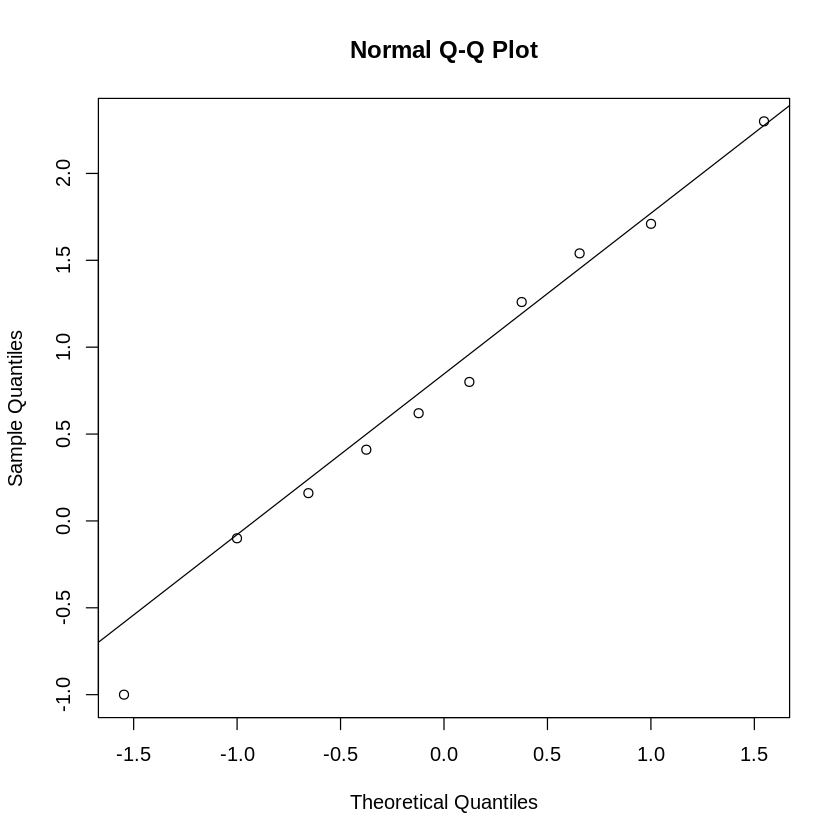

In [1]:
x<-c(-1,-0.1,0.16,0.41,0.62,
	0.80,1.26,1.54,1.71,2.30)
qqnorm(x)
qqline(x)

In [2]:
n<-length(x)
q<-seq((1-0.5)/n,(n-0.5)/n,1/n)
# q<-seq(from=(1-0.5)/n,by=1/n,length.out=n)
round(qnorm(q,mean=0,sd=1),3)
cbind(sort(x),q,round(qnorm(q,mean=0,sd=1),3))

[1] -1.645 -1.036 -0.674 -0.385 -0.126  0.126  0.385  0.674  1.036  1.645

,q,
-1.00,0.05,-1.645
-0.10,0.15,-1.036
0.16,0.25,-0.674
0.41,0.35,-0.385
0.62,0.45,-0.126
0.80,0.55,0.126
1.26,0.65,0.385
1.54,0.75,0.674
1.71,0.85,1.036
2.30,0.95,1.645


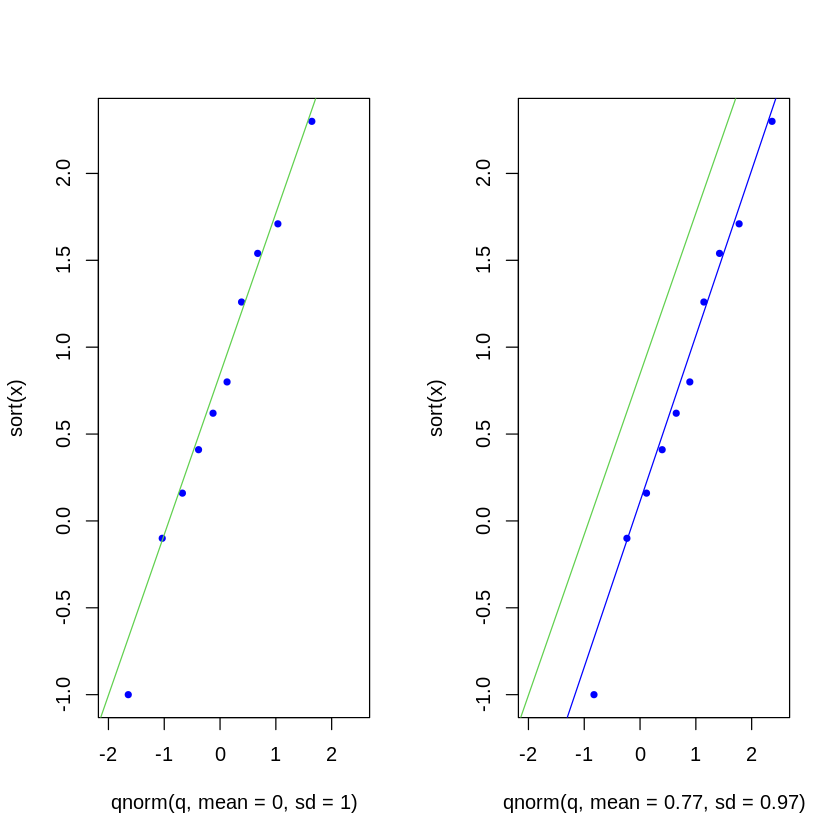

In [3]:
par(mfrow=c(1,2))
plot(qnorm(q,mean=0,sd=1),sort(x),pch=20,col="blue",xlim=c(-2,2.5))
qqline(distribution = function(p) qnorm(p,mean=0,sd=1),x,
       prob = c(0.25, 0.75), col = 3)

plot(qnorm(q,mean=0.77,sd=0.97),sort(x),pch=20,col="blue",xlim=c(-2,2.5))
qqline(distribution = function(p) qnorm(p,mean=0.77,sd=0.97),x,
       prob = c(0.25, 0.75), col ="blue")
qqline(distribution = function(p) qnorm(p,mean=0,sd=1), x,
       prob = c(0.25, 0.75), col = 3)

par(mfrow=c(1,1))

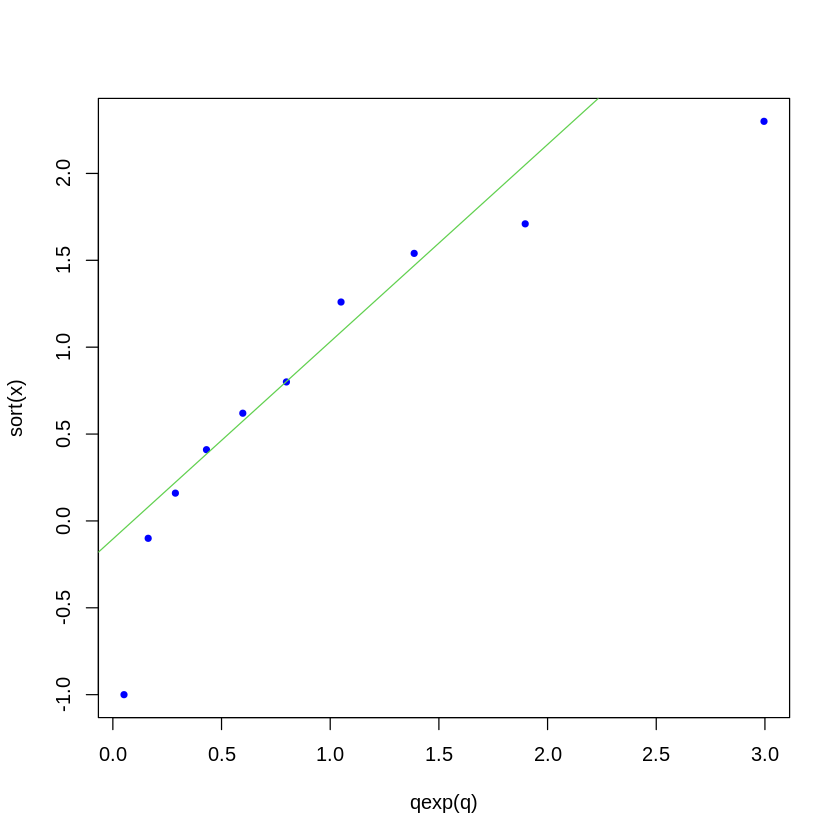

In [4]:
#  exponential (instead of qnorm use qexp)

plot(qexp(q),sort(x),pch=20,col="blue")
qqline(distribution = function(p) qexp(p, rate=1), x,
       prob = c(0.25, 0.75), col = 3)

# slope<-(quantile(x,probs=0.75)-quantile(x,probs=0.25))/
#		(qexp(0.75)-qexp(0.25))
# intercept<-quantile(x,probs=0.75)-slope*qexp(0.75)
# abline(a=intercept,b=slope,lwd=1.5,col="green")

[1] -1.00 -0.10  0.16  0.41  0.62  0.80  1.26  1.54  1.71  2.30

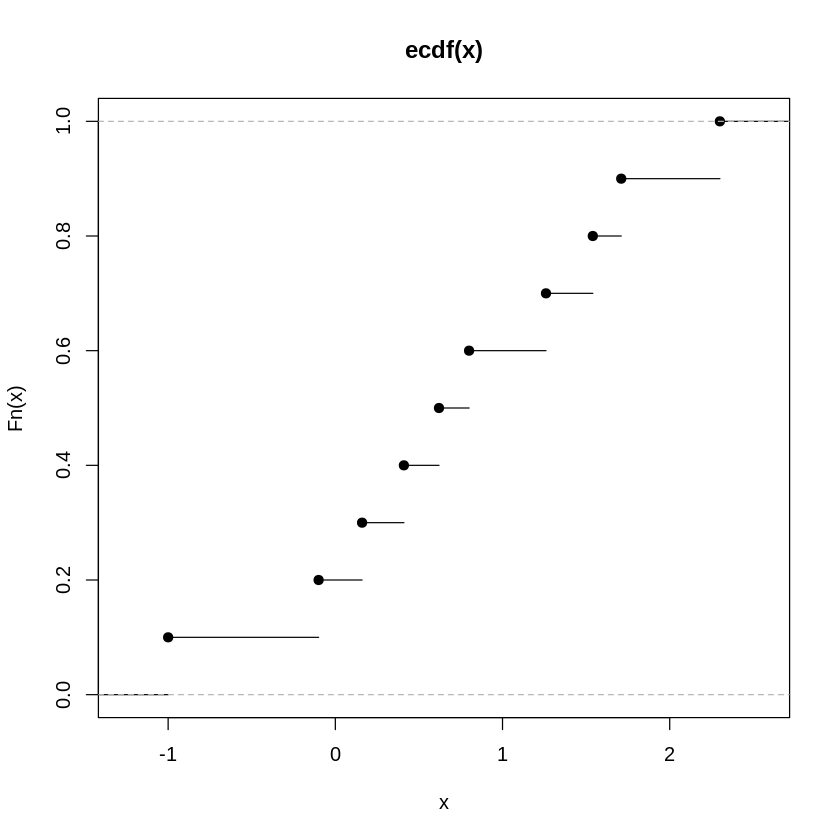

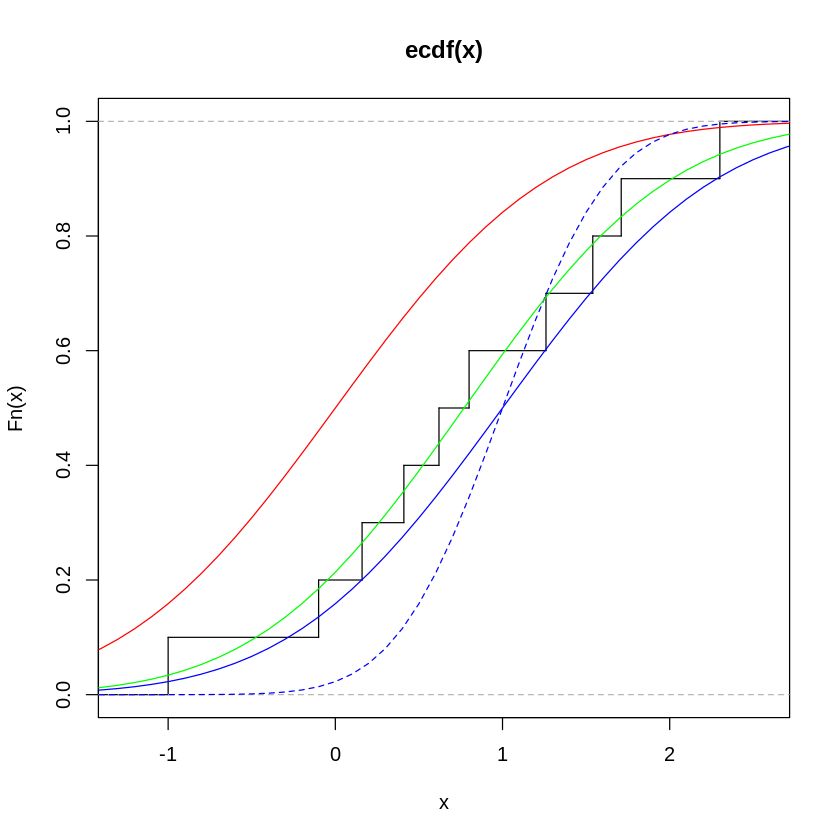

In [5]:
#
# Kolmogorov-Smirnof Test
#

sort(x)
Fx<-ecdf(x)
plot(Fx)
plot(Fx, do.points=FALSE, verticals=TRUE)
Mx<-mean(x)
Sx<-sd(x)
curve(pnorm(x,mean=0,sd=1), add=TRUE, xlim=c(-5,5),col="red")
curve(pnorm(x,mean=1,sd=1), add=TRUE, xlim=c(-5,5),col="blue")
curve(pnorm(x,mean=1,sd=0.5), add=TRUE, xlim=c(-5,5),col="blue",lty=2)
curve(pnorm(x,mean=Mx,sd=Sx), add=TRUE, xlim=c(-5,5),col="green")

In [6]:
# N(0,1)

ks.test(x,"pnorm")
ks.test(x,"pnorm",mean=0,sd=1,alternative ="greater")
ks.test(x,"pnorm",mean=0,sd=1,alternative ="less")


	Exact one-sample Kolmogorov-Smirnov test

data:  x
D = 0.36356, p-value = 0.1085
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D^+ = 0.010724, p-value = 0.9882
alternative hypothesis: the CDF of x lies above the null hypothesis



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D^- = 0.36356, p-value = 0.05425
alternative hypothesis: the CDF of x lies below the null hypothesis


In [7]:
n<-length(x)
order.x<-sort(x)
ecdf(x)(order.x)
Fn<-ecdf(x)(order.x)
Fn
F0<-pnorm(order.x,mean=0,sd=1)
cbind(order.x,Fn,F0,Fn-F0,F0-c(0,Fn[-n]))

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

order.x,Fn,F0,,
-1.00,0.1,0.1586553,-0.05865525,0.15865525
-0.10,0.2,0.4601722,-0.26017216,0.36017216
0.16,0.3,0.5635595,-0.26355946,0.36355946
0.41,0.4,0.6590970,-0.25909703,0.35909703
0.62,0.5,0.7323711,-0.23237111,0.33237111
0.80,0.6,0.7881446,-0.18814460,0.28814460
1.26,0.7,0.8961653,-0.19616532,0.29616532
1.54,0.8,0.9382198,-0.13821982,0.23821982
1.71,0.9,0.9563671,-0.05636706,0.15636706
2.30,1.0,0.9892759,0.01072411,0.08927589


In [8]:
# N(1,1)
ks.test(x,"pnorm",mean=1,sd=1)
ks.test(x,"pnorm",mean=1,sd=1,alternative ="greater")
ks.test(x,"pnorm",mean=1,sd=1,alternative ="less")


	Exact one-sample Kolmogorov-Smirnov test

data:  x
D = 0.17926, p-value = 0.8506
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D^+ = 0.17926, p-value = 0.4709
alternative hypothesis: the CDF of x lies above the null hypothesis



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D^- = 0.035666, p-value = 0.9511
alternative hypothesis: the CDF of x lies below the null hypothesis


In [9]:
# N(1,0.5^2)
ks.test(x,"pnorm",mean=1,sd=0.5)
ks.test(x,"pnorm",mean=1,sd=0.5,alternative ="greater")
ks.test(x,"pnorm",mean=1,sd=0.5,alternative ="less")


	Exact one-sample Kolmogorov-Smirnov test

data:  x
D = 0.281, p-value = 0.3421
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D^+ = 0.281, p-value = 0.1716
alternative hypothesis: the CDF of x lies above the null hypothesis



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D^- = 0.15993, p-value = 0.5448
alternative hypothesis: the CDF of x lies below the null hypothesis


In [10]:
#
#  N(mean(x),var(x))
#
#   DEN EPITREPETAI
#
ks.test(x,"pnorm",mean=mean(x),sd=sd(x))
ks.test(x,"pnorm",mean=mean(x),sd=sd(x),alternative ="greater")
ks.test(x,"pnorm",mean=mean(x),sd=sd(x),alternative ="less")


	Exact one-sample Kolmogorov-Smirnov test

data:  x
D = 0.09323, p-value = 0.9999
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D^+ = 0.087667, p-value = 0.8132
alternative hypothesis: the CDF of x lies above the null hypothesis



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D^- = 0.09323, p-value = 0.7921
alternative hypothesis: the CDF of x lies below the null hypothesis



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D = 0.2, p-value = 0.7487
alternative hypothesis: two-sided


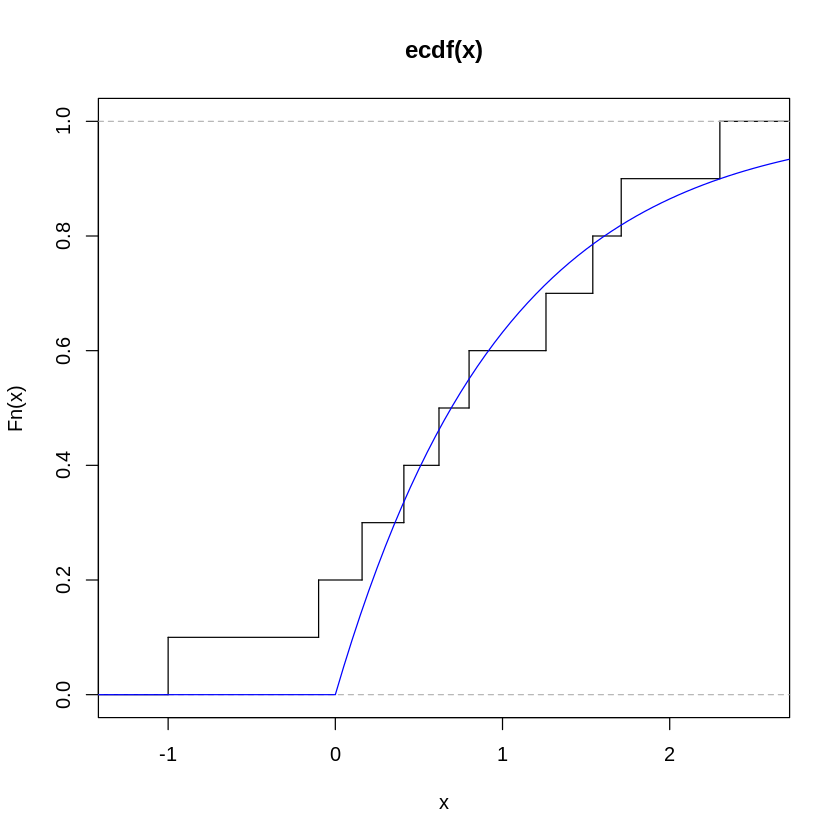

In [11]:
# Exp(rate=1)  E(X)=1/rate
plot(Fx, do.points=FALSE, verticals=TRUE)
curve(pexp(x,rate=1), add=TRUE, xlim=c(-2,3),col="blue")

ks.test(x,"pexp",rate=1)

In [12]:
#
# test of normality
#

shapiro.test(x)


y<-c(0.12, 1.01, 0.17, 1.77, 0.27, 0.98, 0.11, 0.12, 0.01, 0.34) # from exponential distribution

shapiro.test(y)


	Shapiro-Wilk normality test

data:  x
W = 0.98996, p-value = 0.9968



	Shapiro-Wilk normality test

data:  y
W = 0.7789, p-value = 0.008028


The Shapiro-Wilk correctly finds that y is not from a normal distribution

In [13]:
install.packages("nortest")
library(nortest)
lillie.test

lillie.test(x)

lillie.test(y)
ks.test(y,"pnorm",mean=mean(y),sd=sd(y))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



function (x) 
{
    DNAME <- deparse(substitute(x))
    x <- sort(x[complete.cases(x)])
    n <- length(x)
    if (n < 5) 
        stop("sample size must be greater than 4")
    p <- pnorm((x - mean(x))/sd(x))
    Dplus <- max(seq(1:n)/n - p)
    Dminus <- max(p - (seq(1:n) - 1)/n)
    K <- max(Dplus, Dminus)
    if (n <= 100) {
        Kd <- K
        nd <- n
    }
    else {
        Kd <- K * ((n/100)^0.49)
        nd <- 100
    }
    pvalue <- exp(-7.01256 * Kd^2 * (nd + 2.78019) + 2.99587 * 
        Kd * sqrt(nd + 2.78019) - 0.122119 + 0.974598/sqrt(nd) + 
        1.67997/nd)
    if (pvalue > 0.1) {
        KK <- (sqrt(n) - 0.01 + 0.85/sqrt(n)) * K
        if (KK <= 0.302) {
            pvalue <- 1
        }
        else if (KK <= 0.5) {
            pvalue <- 2.76773 - 19.828315 * KK + 80.709644 * 
                KK^2 - 138.55152 * KK^3 + 81.218052 * KK^4
        }
        else if (KK <= 0.9) {
            pvalue <- -4.901232 + 40.662806 * KK - 97.490286 * 
                KK^2 + 94.029866 * KK^3 - 32.355711 * KK^4
        }
        else if (KK <= 1.31) {
            pvalue <- 6.198765 - 19.558097 * KK + 23.186922 * 
                KK^2 - 12.234627 * KK^3 + 2.423045 * KK^4
        }
        else {
            pvalue <- 0
        }
    }
    RVAL <- list(statistic = c(D = K), p.value = pvalue, method = "Lilliefors (Kolmogorov-Smirnov) normality test", 
        data.name = DNAME)
    class(RVAL) <- "htest"
    return(RVAL)
}
<bytecode: 0x558cd103b320>
<environment: namespace:nortest>


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  x
D = 0.09323, p-value = 0.999



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  y
D = 0.30299, p-value = 0.009772


Warning message in ks.test.default(y, "pnorm", mean = mean(y), sd = sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  y
D = 0.30299, p-value = 0.3176
alternative hypothesis: two-sided


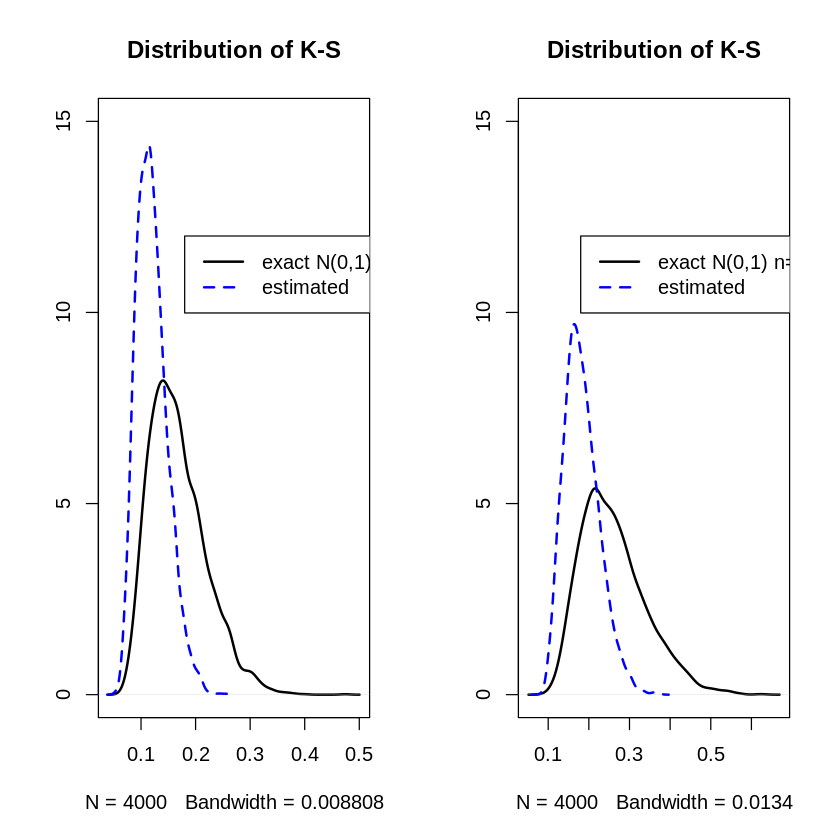

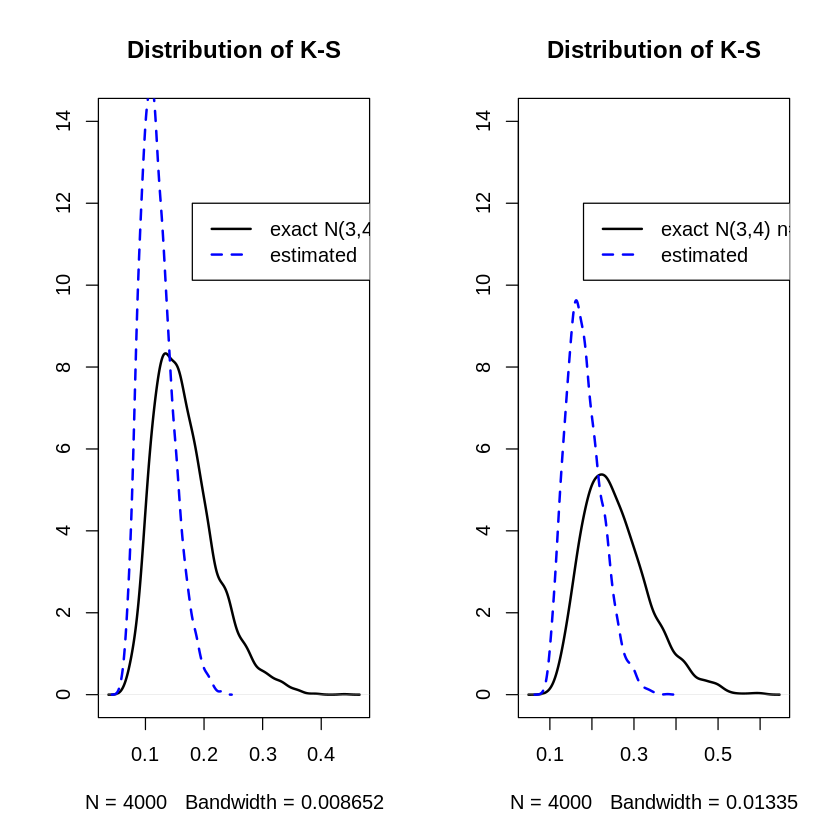

In [14]:
par(mfrow=c(1,2))
res<-replicate(4000,{
	x<-rnorm(25,mean=0,sd=1)
	c(ks.test(x,"pnorm",mean=mean(x),sd=sd(x))$statistic,
	  ks.test(x,"pnorm",mean=0,sd=1)$statistic)
})
plot(density(res[2,]),main="Distribution of K-S", ylab="",lwd=2,ylim=c(0,15))
lines(density(res[1,]),lwd=2,lty=2,col="blue")
legend(0.18,12,legend=c("exact N(0,1) n=25","estimated"),
	lty=1:2,lwd=c(2,2),col=c(1,"blue"))

res<-replicate(4000,{
	x<-rnorm(10,mean=0,sd=1)
	c(ks.test(x,"pnorm",mean=mean(x),sd=sd(x))$statistic,
	  ks.test(x,"pnorm",mean=0,sd=1)$statistic)
})
plot(density(res[2,]),main="Distribution of K-S", ylab="",lwd=2,ylim=c(0,15))
lines(density(res[1,]),lwd=2,lty=2,col="blue")
legend(0.18,12,legend=c("exact N(0,1) n=10","estimated"),
	lty=1:2,lwd=c(2,2),col=c(1,"blue"))

res<-replicate(4000,{
	x<-rnorm(25,mean=3,sd=2)
	c(ks.test(x,"pnorm",mean=mean(x),sd=sd(x))$statistic,
	  ks.test(x,"pnorm",mean=3,sd=2)$statistic)
})
plot(density(res[2,]),main="Distribution of K-S", ylab="",lwd=2,ylim=c(0,14))
lines(density(res[1,]),lwd=2,lty=2,col="blue")
legend(0.18,12,legend=c("exact N(3,4) n=25","estimated"),
	lty=1:2,lwd=c(2,2),col=c(1,"blue"))


res<-replicate(4000,{
	x<-rnorm(10,mean=3,sd=2)
	c(ks.test(x,"pnorm",mean=mean(x),sd=sd(x))$statistic,
	  ks.test(x,"pnorm",mean=3,sd=2)$statistic)
})
plot(density(res[2,]),main="Distribution of K-S", ylab="",lwd=2,ylim=c(0,14))
lines(density(res[1,]),lwd=2,lty=2,col="blue")
legend(0.18,12,legend=c("exact N(3,4) n=10","estimated"),
	lty=1:2,lwd=c(2,2),col=c(1,"blue"))

par(mfrow=c(1,1))

In [15]:
M<-100
res<-replicate(M,{y<-rexp(10,1)
	c(ks.test(y,"pnorm")$p,
	lillie.test(y)$p,
	shapiro.test(y)$p)
})

round(t(res),4)
sum(t(res)[,2]>t(res)[,3])/M

0.0032,0.0173,0.0257
0.0002,0.0124,0.0202
0.0016,0.0064,0.0008
0.0077,0.9146,0.6551
0.0007,0.0581,0.0523
0.0069,0.3027,0.0471
0.0051,0.0115,0.0160
0.0066,0.0546,0.0181
0.0001,0.0206,0.0048
0.0047,0.2592,0.1590
0.0027,0.3034,0.5180


[1] 0.79

In [16]:
M<-100
res<-replicate(M,{y<-rexp(10,1)
	c(ks.test(y,"pnorm")$p,
	lillie.test(y)$p,
	shapiro.test(y)$p  # ,S.ks.gof(y)$p
)
})

round(t(res),4)
sum(t(res)[,2]>t(res)[,3])/M
#sum(t(res)[,4]>t(res)[,3])/M

shapiro.test(y)

0.0024,0.1331,0.0491
0.0032,0.5921,0.2131
0.0025,0.6394,0.3509
0.0023,0.0191,0.0213
0.0061,0.0003,0.0002
0.0050,0.0001,0.0008
0.0073,0.2039,0.1310
0.0020,0.1373,0.0071
0.0003,0.1213,0.0123
0.0009,0.0292,0.0049
0.0067,0.0044,0.0027


[1] 0.81


	Shapiro-Wilk normality test

data:  y
W = 0.7789, p-value = 0.008028


In [17]:
#
#    Applications

####################################
x<-c(0.2, -0.5, -1.3, -1.6, -0.7, 0.4, -0.1, 0.0, -0.6, -1.1, -1.2, -0.8)

lillie.test(x)
shapiro.test(x)
lillie.test(x)$p; shapiro.test(x)$p
m0<--0.8
t.test(x,mu=m0)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  x
D = 0.12232, p-value = 0.8892



	Shapiro-Wilk normality test

data:  x
W = 0.96694, p-value = 0.8763


[1] 0.8891601

[1] 0.8762924


	One Sample t-test

data:  x
t = 1.0487, df = 11, p-value = 0.3168
alternative hypothesis: true mean is not equal to -0.8
95 percent confidence interval:
 -1.0105948 -0.2060719
sample estimates:
 mean of x 
-0.6083333 


In [18]:
CityCost<-c(13, 21, 22, 22, 24, 25, 26, 26, 26, 26,
30, 32, 33, 34, 34, 35, 35, 35, 35, 36,
37, 37, 39, 39, 39, 40, 41, 41, 41, 42,
43, 44, 45, 46, 50, 50, 51, 51, 53, 53,
53, 55, 57, 61, 62, 62, 62, 66, 68, 75)


SuburbanCost<-c(21, 22, 25, 25, 26, 26, 27, 27, 28, 28,
28, 29, 31, 32, 32, 35, 35, 36, 37, 37,
37, 38, 38, 38, 39, 40, 40, 41, 41, 41,
42, 42, 43, 44, 47, 47, 47, 48, 50, 50)

x<-CityCost
y<-SuburbanCost
n<-length(x)
m<-length(y)

lillie.test(x)$p; shapiro.test(x)$p
lillie.test(y)$p; shapiro.test(y)$p

a<-0.01
d0<-1
var.test(x,y,ratio=d0,conf.level= 1-a)


[1] 0.3415578

[1] 0.4942601

[1] 0.2097248

[1] 0.1820923


	F test to compare two variances

data:  x and y
F = 2.962, num df = 49, denom df = 39, p-value = 0.0006743
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 1.315084 6.467398
sample estimates:
ratio of variances 
          2.961951 


In [19]:
AnalystA<-c(1.60, 1.74, 1.72, 1.85, 1.76, 1.72, 1.78)
AnalystB<-c(1.72, 1.75, 1.55, 1.67, 2.05, 1.51, 1.70)

ks.test(AnalystA-AnalystB,"pnorm")$p
lillie.test(AnalystA-AnalystB)$p
shapiro.test(AnalystA-AnalystB)$p
t.test(AnalystA,AnalystB,paired=T)$p.value

[1] 0.1289927

[1] 0.5189018

[1] 0.328875

[1] 0.6674726

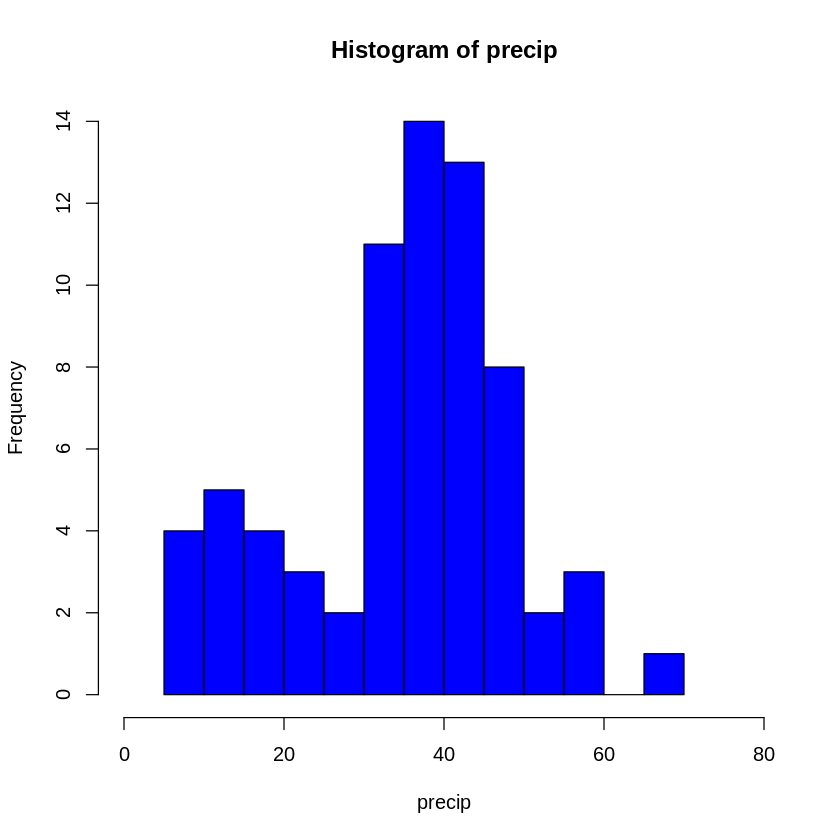

[1] 0.03812166

[1] 0.04492529


	One Sample t-test

data:  precip
t = -0.069761, df = 69, p-value = 0.9446
alternative hypothesis: true mean is not equal to 35
95 percent confidence interval:
 31.61748 38.15395
sample estimates:
mean of x 
 34.88571 


Warning message in ks.test.default(precip, "pnorm", mean = 35, sd = 13.7):
“ties should not be present for the Kolmogorov-Smirnov test”


[1] 0.4124419

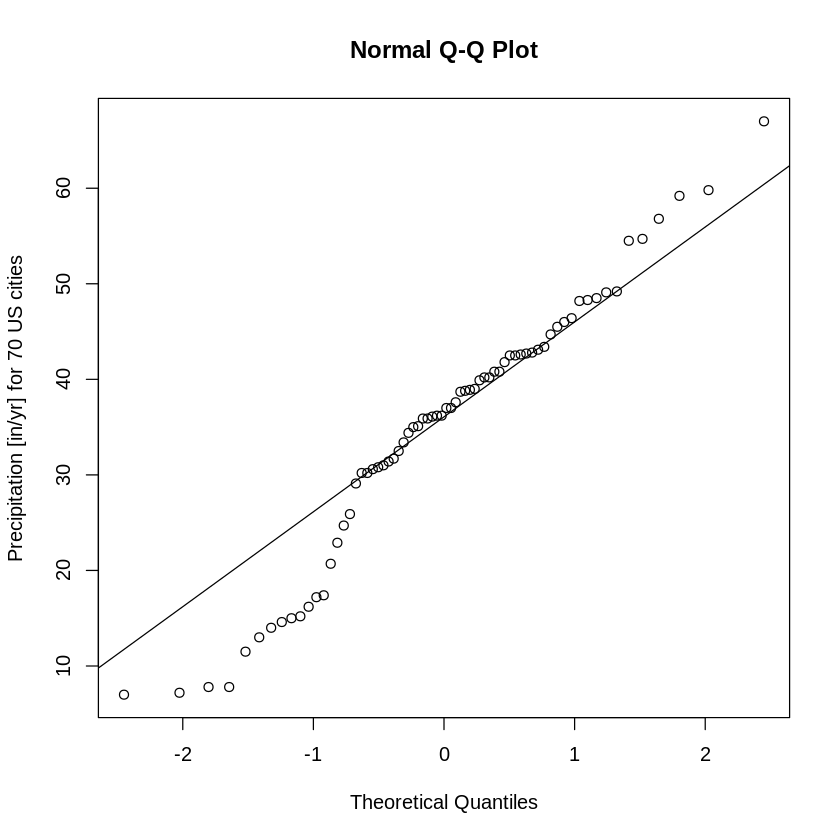

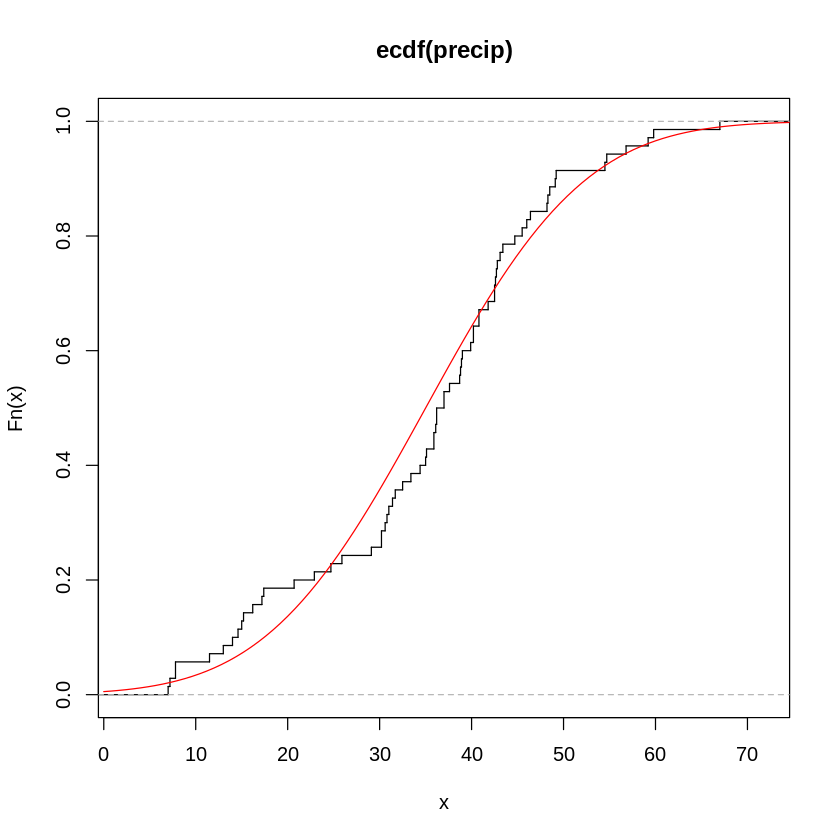

In [20]:
# precip {datasets}

hist(precip,nclass=20,xlim=c(0,80),col="blue")
qqnorm(precip, ylab = "Precipitation [in/yr] for 70 US cities")
qqline(precip)
lillie.test(precip)$p; shapiro.test(precip)$p
t.test(precip,mu=35)
ks.test(precip,"pnorm",mean=35,sd=13.7)$p

Fx<-ecdf(precip)
plot(Fx, do.points=FALSE, verticals=TRUE)
curve(pnorm(x,mean=35,sd=13.7), add=TRUE, xlim=c(0,80),col="red")